In [109]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [110]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [111]:
import os
import cv2
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Dataset path
DIRECTORY = r"C:/Users/lenovo/Desktop/Siar-dataset"
CATEGORIES = ["Normal", "Tumor"]

# Load dataset (two classes images)
X = []
Y = []


In [112]:

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)

        try:
            # Load image and convert to grayscale
            image = cv2.imread(img_path)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image, (224, 224))
            gray_image = np.expand_dims(gray_image, axis=-1)
            # Adding the channel dimension

            # Preprocess and append to dataset
            gray_image = img_to_array(gray_image)
            gray_image = preprocess_input(gray_image)
            X.append(gray_image)
            Y.append(category)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [114]:
X = np.array(X)
Y=np.array(Y)

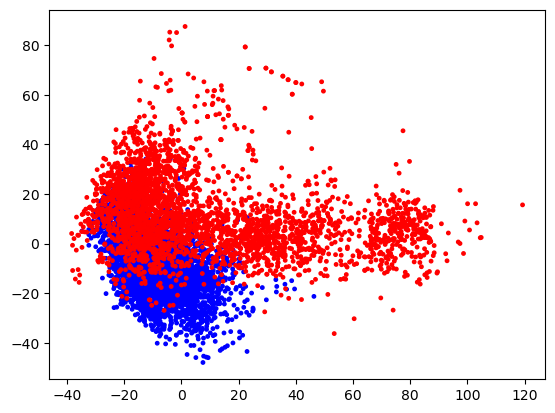

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already loaded X and Y

# Reduce the dimensionality of the data (e.g., by using PCA)
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit and transform your data to 2D
X_2d = pca.fit_transform(X.reshape(X.shape[0], -1))

# Create a dictionary to map labels to colors
label_to_color = {"Normal": "blue", "Tumor": "red"}

# Create a list of colors based on the labels
point_colors = [label_to_color[label] for label in Y]

# Now you can create a 2D scatter plot with the specified colors
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=point_colors, s=6)
plt.show()


In [118]:
Y_encoding = []

# Assigning 1 for 'Tumor' and 0 for 'Normal'
for label in Y:
    if label == 'Tumor':
        Y_encoding.append(1)  # Assign 1 for 'Tumor'
    elif label == 'Normal':
        Y_encoding.append(0)
Y_new=np.array(Y_encoding)
print(Y_new)

[0 0 0 ... 1 1 1]


In [119]:
# (≈ 3 lines of code)
# shape_X = ...
# shape_Y = ...
# training set size
# m = ...
# YOUR CODE STARTS HERE
shape_X = X.shape
shape_Y = Y_new.shape
m = X.shape[1]

# YOUR CODE ENDS HERE

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (6999, 224, 224, 1)
The shape of Y is: (6999,)
I have m = 224 training examples!


In [120]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_new, test_size=0.2, random_state=42)
print('Train data, number of images: ', len(X_train))
print('Test data, number of images: ', len(X_test))

Train data, number of images:  5599
Test data, number of images:  1400


In [194]:
# prepare data loaders, set the batch_size
## TODO: you can try changing the batch_size to be larger or smaller
## when you get to training your network, see how batch_size affects the loss
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
batch_size = 32
train_generator = train_datagen.flow(X_train, Y_train, batch_size=batch_size)
test_generator = test_datagen.flow(X_test, Y_test, batch_size=batch_size)

# specify the image classes
classes = ["Normal","Tumor"]

### Visualize some training data

This cell iterates over the training dataset, loading a random batch of image/label data, using `dataiter.next()`. It then plots the batch of images and labels in a `2 x batch_size/2` grid.

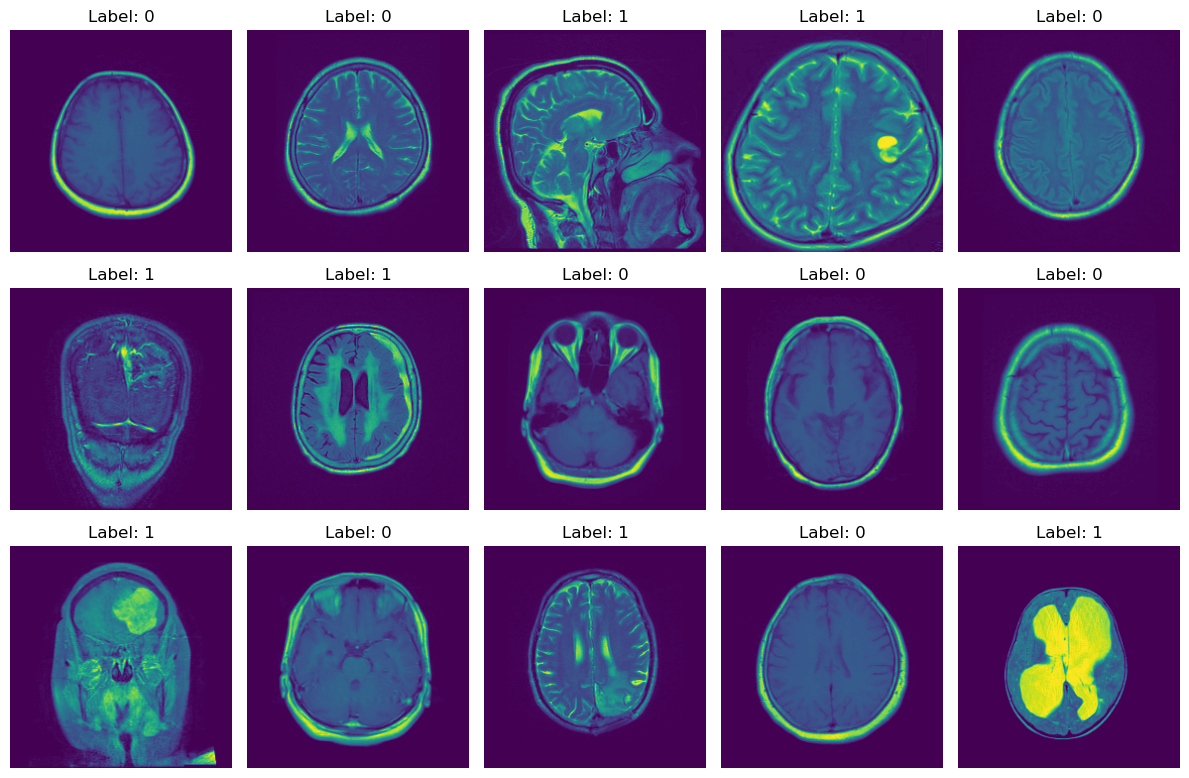

In [195]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Assuming 'train_generator' is already defined as mentioned in the previous code

# Obtain one batch of training images
batch_images, batch_labels = next(train_generator)

# Plot the images in the batch along with their corresponding labels
num_images_to_display = 15  # Number of images to display

plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    plt.subplot(3, 5, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f'Label: {batch_labels[i]}', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

Build the model 

In [168]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [169]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_51 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 110, 110, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_52 (Conv2D)          (None, 108, 108, 64)    

In [66]:
# train_datagen2 = image.ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,  # Corrected parameter name
#     horizontal_flip=True
# )

# test_dataset = image.ImageDataGenerator(rescale=1./255)


In [197]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.001,
    zoom_range=0.001,
    horizontal_flip=1,brightness_range=(0.5,0.25)
)

# Specify target size within ImageDataGenerator, not in the flow method
train_generator = train_datagen.flow(
    X_train,  # Replace 'X_train' with your actual training data
    y=Y_train,  # Replace 'Y_train' with your actual training labels
    batch_size=32,
)


In [198]:
test_generator = train_datagen2.flow(X_test, Y_test, batch_size=32)

In [199]:
print(train_datagen)

In [200]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=test_generator,  # The corrected parameter name
    validation_steps=2
)


Epoch 1/10


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17336\3662162120.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


8/8 [==============================] - 36s 4s/step - loss: 2.3957 - accuracy: 0.6549 - val_loss: 1.3614 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 35s 4s/step - loss: 1.0938 - accuracy: 0.8516 - val_loss: 1.4464 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 37s 5s/step - loss: 1.1241 - accuracy: 0.8906 - val_loss: 1.3962 - val_accuracy: 0.5625
Epoch 4/10
8/8 [==============================] - 39s 5s/step - loss: 0.9546 - accuracy: 0.8984 - val_loss: 1.3189 - val_accuracy: 0.5625
Epoch 5/10
8/8 [==============================] - 39s 5s/step - loss: 0.8180 - accuracy: 0.9219 - val_loss: 1.2423 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 37s 5s/step - loss: 0.7015 - accuracy: 0.9414 - val_loss: 1.1833 - val_accuracy: 0.3438
Epoch 7/10
8/8 [==============================] - 35s 4s/step - loss: 0.7464 - accuracy: 0.9059 - val_loss: 1.1306 - val_accuracy: 0.4844
Epoch 8/10
8/8 [=============================

In [201]:
# Perform evaluation using the test generator
evaluation = model.evaluate(test_generator)

# Alternatively, you can also evaluate with actual data rather than a generator
# For example, if you have test data X_test and Y_test, you can use:
# evaluation = model.evaluate(X_test, Y_test)

# Display the evaluation results
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

44/44 [==============================] - 28s 629ms/step - loss: 1.0403 - accuracy: 0.4521
Evaluation Loss: 1.0402522087097168
Evaluation Accuracy: 0.4521428644657135
